In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy.stats import chi2

# to read mzML files
from pyteomics import mzml

# to visualize MS/MS and obtain ground truth
from pyteomics import pylab_aux as pa
from pyteomics import mass

# to find peaks
from scipy.signal import find_peaks

In [3]:
peptide = "HELIEFR"

In [4]:
pep_df = pd.read_csv(f"../fits/{peptide}_fits")

In [5]:
pep_df.head(20)

,Unnamed: 0,index,sequence,peaks,len_pep,rank_sum,rank_p,SSE,mz_fid_p,combined_p
0,0,250468,"['H', 'E', 'LL', 'VM', 'T', 'T']","[943.502572, 806.44043, 677.398987, 451.228271...",7,95,0.000001,0.000079,0.000001,2.863102e-11
1,1,254629,"['H', 'E', 'L', 'F', 'LE', 'R']","[943.502572, 806.44043, 677.398987, 564.313843...",7,121,0.000001,0.000008,0.000001,2.863102e-11
2,2,229349,"['H', 'AL', 'E', 'L', 'M', 'L']","[943.502572, 806.44043, 622.31842, 493.277924,...",7,134,0.000001,0.000050,0.000001,2.863102e-11
3,3,205753,"['H', 'LE', 'AL', 'L', 'M']","[943.502572, 806.44043, 564.313843, 380.192444...",6,60,0.000001,0.000008,0.000001,2.863102e-11
4,4,229357,"['H', 'AL', 'E', 'L', 'L', 'TF']","[943.502572, 806.44043, 622.31842, 493.277924,...",7,124,0.000001,0.000010,0.000001,2.863102e-11
5,5,205750,"['H', 'LE', 'AL', 'L', 'TF']","[943.502572, 806.44043, 564.313843, 380.192444...",6,55,0.000001,0.000008,0.000001,2.863102e-11
6,6,252000,"['H', 'E', 'AL', 'L', 'M', 'L']","[943.502572, 806.44043, 677.398987, 493.277924...",7,92,0.000001,0.000042,0.000001,2.863102e-11
7,7,254715,"['H', 'E', 'L', 'F', 'L', 'VW']","[943.502572, 806.44043, 677.398987, 564.313843...",7,134,0.000001,0.000009,0.000001,2.863102e-11
8,8,254716,"['H', 'E', 'L', 'F', 'L', 'SP', 'T']","[943.502572, 806.44043, 677.398987, 564.313843...",8,154,0.000001,0.000022,0.000001,2.863102e-11
9,9,254209,"['H', 'E', 'L', 'LE', 'F', 'R']","[943.502572, 806.44043, 677.398987, 564.313843...",7,50,0.000001,0.000008,0.000001,2.863102e-11


In [6]:
m_df = pd.read_csv("../data/PSM_df.csv")

In [21]:
m_df.iloc[r_list]

,Spectrum,Peptide,Hyperscore
10060,"{'index': 31068, 'id': 'controllerType=0 contr...",IQASGILQLFASLLTPQSSCK,12.716
6092,"{'index': 23471, 'id': 'controllerType=0 contr...",GTAVFWYNLLR,25.189
4809,"{'index': 17612, 'id': 'controllerType=0 contr...",AILVDLEPGTMDSVR,28.297
3787,"{'index': 26106, 'id': 'controllerType=0 contr...",GQNDLMGTAEDFADQFLR,31.125
7405,"{'index': 11886, 'id': 'controllerType=0 contr...",LNSAIIYDR,21.993
348,"{'index': 18162, 'id': 'controllerType=0 contr...",AFVHWYVGEGMEEGEFSEAR,51.192
4467,"{'index': 16169, 'id': 'controllerType=0 contr...",VDSPVTVCGDIHGQFYDLK,29.182
6408,"{'index': 11681, 'id': 'controllerType=0 contr...",IDDPTDSKPEDWDKPEHIPDPDAK,24.399
7781,"{'index': 20560, 'id': 'controllerType=0 contr...",TDLVPAFQNLMK,21.080
1979,"{'index': 17653, 'id': 'controllerType=0 contr...",ESQISAEIELLPTNDK,37.619


In [8]:
r_list = [10060,6092,4809,3787,7405,348,4467,6408,7781,1979,9160,3747,5584,5166,6547,3012,8975,6517,2453,4444]

In [16]:
array = np.array
eval(m_df.iloc[index]["Spectrum"])

{'index': 31068,
 'id': 'controllerType=0 controllerNumber=1 scan=31069',
 'defaultArrayLength': 27,
 'scanList': {'count': 1,
  'scan': [{'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 120.0,
       'scan window upper limit': 2330.0}]},
    'scan start time': 59.621957,
    'mass resolving power': 17500.0,
    'filter string': 'FTMS + c NSI d Full ms2 1131.62@hcd27.00 [120.00-2330.00]',
    'preset scan configuration': 2.0,
    'ion injection time': 50.000000745058,
    '[Thermo Trailer Extra]Monoisotopic M/Z:': 0.0}],
  'no combination': ''},
 'precursorList': {'count': 1,
  'precursor': [{'spectrumRef': 'controllerType=0 controllerNumber=1 scan=31068',
    'isolationWindow': {'isolation window target m/z': 1131.621874988079,
     'isolation window lower offset': 0.800000011921,
     'isolation window upper offset': 0.800000011921,
     'ms level': 1},
    'selectedIonList': {'count': 1,
     'selectedIon': [{'selected ion m/z': 1131.621874988079,
    

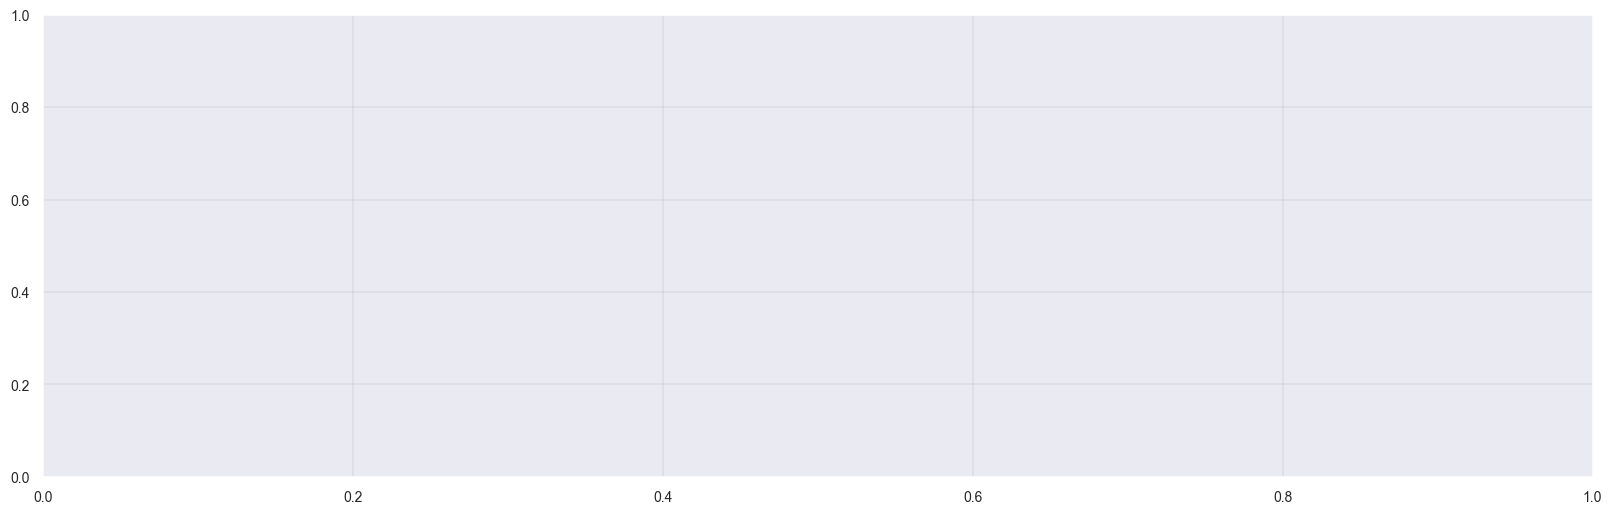

In [22]:
array = np.array
sns.set_theme(rc={'figure.figsize':(20,6)})
for index in r_list:
    peppi = m_df.iloc[index]["Peptide"]
    spectri = eval(m_df.iloc[index]["Spectrum"])
    mz_array = spectri['m/z array']
    intensity_array = spectri['intensity array']
    precursor_mz = spectri['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['selected ion m/z']
    plotting_dict = {'m/z array': mz_array, 'intensity array': intensity_array}

    pa.annotate_spectrum(plotting_dict, peppi, precursor_charge=2, backend='spectrum_utils',
    ion_types='aby', title=peppi)

    plt.savefig(f"../pyteomics_annotations/{peppi}.png")
    plt.cla()

In [ ]:
AAAAVVEFQR